# Crawling data berita

In [1]:
!pip install requests
!pip install beautifulsoup4

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}

linkberita = 'https://www.liputan6.com/pemilu'
listt = []
n = 5

for page in range(1, n+1):
  req = requests.get(linkberita)
  soup = BeautifulSoup(req.text, 'html.parser')
  items = soup.findAll('span class', 'header header--sumpah-pemuda clearfix')
  for it in items:
    link = it.find('a','article__link')['href']

    req2 = requests.get(link)
    soup2 = BeautifulSoup(req2.text, 'html.parser')
    judul = soup2.find('h1', 'read__title').text
    isi = "".join(soup2.find('div', 'read__content').text.split('\n'))
    print(judul)
    print(isi)
    listt.append([judul, isi])

In [ ]:
df = pd.DataFrame(listt, columns=['Judul', 'Isi'])
print(df)
df.to_csv('berita6.csv')

Empty DataFrame
Columns: [Judul, Isi]
Index: []


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/elmatiaaa/uts_ppw/main/berita.csv')
df

,Unnamed: 0,Judul,Isi


In [ ]:
def cleaning(text):
    # Remove non-alphabetic characters (letters, spaces, and punctuation other than periods)
    text = re.sub(r'[^a-zA-Z\s.,]', '', text).strip()
    return text

df['Cleaning'] = df['Isi'].apply(cleaning)
df['Cleaning']

Series([], Name: Cleaning, dtype: object)

In [ ]:
from nltk.tokenize import sent_tokenize
# Fungsi untuk mengekstrak artikel menjadi kalimat
def extract_sentences(article):
    sentences = sent_tokenize(article)
    return sentences

# Menerapkan fungsi extract_sentences ke setiap baris dalam kolom 'artikel'
df['Kalimat'] = df['Cleaning'].apply(extract_sentences)
df['Kalimat']

Series([], Name: Kalimat, dtype: object)

In [ ]:
df['Kalimat'][0]

KeyError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Dokumen'] = df['Kalimat'].apply(lambda sentences: ' '.join(sentences))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,abdul,acara,ada,adalah,adams,adanya,adapun,adha,adil,adili,...,ya,yakni,yang,yayasan,youtube,ypi,yudho,yudo,yusmic,zaytun
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.034586,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.018764,0.026129,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.083800,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.031247,0.000000,0.128167,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.018107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.067390,0.082389,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.066116,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.047121,0.000000,0.043146,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.000000,0.038585,0.000000,0.070127,0.0,0.021026,0.0,0.035063,0.035063,...,0.000000,0.021026,0.153175,0.000000,0.000000,0.0,0.000000,0.0,0.035063,0.0
81,0.0,0.000000,0.010172,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.016629,0.015143,0.000000,0.000000,0.0,0.138658,0.0,0.000000,0.0
82,0.0,0.000000,0.077688,0.000000,0.000000,0.0,0.025400,0.0,0.000000,0.000000,...,0.000000,0.000000,0.080957,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
83,0.0,0.043604,0.015995,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.059527,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
# Menyimpan hasilnya ke dalam file CSV baru
output_file_path = 'berita_dalam_kalimat1.csv'
df.to_csv(output_file_path, index=False)

In [ ]:
# import library untuk menghitung cosinus similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
len_kalimat = df['Dokumen'].shape[0]
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Dokumen'][i], df['Dokumen'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1

In [ ]:
temp

[['node-0 0&0', 1.0],
 ['node-1 0&1', 0.19975901870192447],
 ['node-2 0&2', 0.1162457446546247],
 ['node-3 0&3', 0.21826966833506753],
 ['node-4 0&4', 0.13367962282947807],
 ['node-5 0&5', 0.19168720540302442],
 ['node-6 0&6', 0.11328484155941032],
 ['node-7 0&7', 0.19564446071418573],
 ['node-8 0&8', 0.09379047475434896],
 ['node-9 0&9', 0.16862558422888],
 ['node-10 0&10', 0.2301133894931891],
 ['node-11 0&11', 0.1829125521763617],
 ['node-12 0&12', 0.15961176783742326],
 ['node-13 0&13', 0.08945158223949382],
 ['node-14 0&14', 0.19390768433124625],
 ['node-15 0&15', 0.17530173652253925],
 ['node-16 0&16', 0.18908529529621057],
 ['node-17 0&17', 1.0],
 ['node-18 0&18', 0.19975901870192447],
 ['node-19 0&19', 0.1162457446546247],
 ['node-20 0&20', 0.21826966833506753],
 ['node-21 0&21', 0.13367962282947807],
 ['node-22 0&22', 0.19168720540302442],
 ['node-23 0&23', 0.11328484155941032],
 ['node-24 0&24', 0.19564446071418573],
 ['node-25 0&25', 0.09379047475434896],
 ['node-26 0&26', 0

In [ ]:
sentences = [df['Dokumen'][0], df['Dokumen'][1], df['Dokumen'][2],df['Dokumen'][3],df['Dokumen'][4],df['Dokumen'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        print(similarity_score)
        if similarity_score > 0.01:  # Sesuaikan threshold sesuai kebutuhan
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.13447729796967955
0.07586588941498343
0.15288738191798085
0.08418339358907159
0.14251168731358396
0.09815194804603994
0.7748810240108038
0.09018622311676897
0.12043239068590265
0.09517288645497778
0.08207759755868775
0.6804133150583866
0.10693097847548269
0.13405226471785492
0.07545902969755852


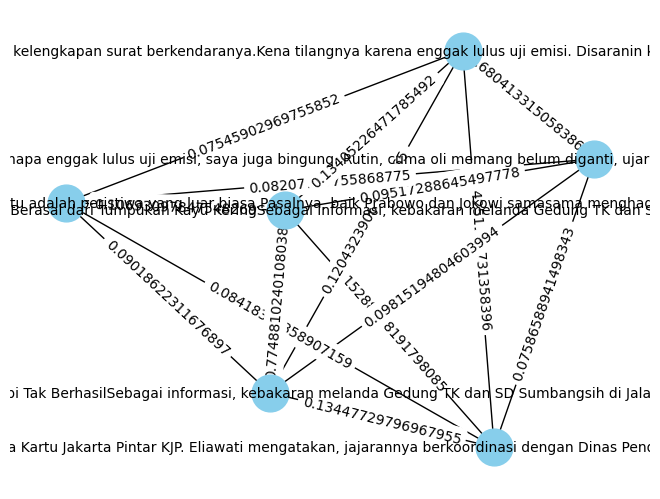

In [ ]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Menampilkan DataFrame
df

,Node,Closeness Centrality
0,"JAKARTA, KOMPAS.com Ketua Umum Partai Gelora ...",11.393746
1,"JAKARTA, KOMPAS.com Kesal dan pasrah, itulah ...",9.826948
2,"JAKARTA, KOMPAS.com Pemerintah Provinsi Pempr...",8.475644
3,"JAKARTA, KOMPAS.com Pengendara yang kendaraan...",7.936609
4,"JAKARTA, KOMPAS.com Kebakaran Gedung Taman Ka...",7.854562
5,"JAKARTA, KOMPAS.com Yayasan Perguruan Sumbang...",7.327421
